In [1]:
# Load the autoreload extension
%load_ext autoreload

# Automatically reload modules before executing code
%autoreload 2

# Predictive ML Plots

In [2]:
from pathlib import Path
from benchmark_src.results_processing import create_plots
from benchmark_src.results_processing.plots.plot_utils import get_task_df, get_list_of_all_runs
from benchmark_src.results_processing.plots import row_similarity_plots
from benchmark_src.results_processing import ranking   
from benchmark_src.results_processing.results_helper import get_setup_infos
from benchmark_src.results_processing.aggregate import aggregate_results
from benchmark_src.results_processing.plots import row_similarity_plots, plot_info, datatype_comparison, more_similar_than_plots, quadrant_charts, predML_plots



In [3]:
results_folder = Path("../../results")
assert results_folder.exists(), f"Could not find results folder at {results_folder}"

predML_plots_folder = results_folder / "plots" / "predictive_ml"
predML_plots_folder.mkdir(exist_ok=True)

mlp_plots_folder = predML_plots_folder / "MLP_model"
mlp_plots_folder.mkdir(exist_ok=True)
xgboost_plots_folder = predML_plots_folder / "XGBoost_model"
xgboost_plots_folder.mkdir(exist_ok=True)

In [4]:
task_df = get_task_df(results_folder=results_folder, task_name="predictive_ml")
task_df = create_plots.predictive_ml_add_task_type(task_df)



Unique datasets (predictive_ml): 51


In [5]:
#task_df

## Configure which approaches to include

In [6]:
# get list as ouptput and copy it to the next cell to comment out approaches not to be plotted
get_list_of_all_runs(task_df)

include_runs = [
    ('GritLM', 'embedding_model=GritLM_GritLM-7B'),
    ('baseline', 'baseline'),
    ('sentence_transformer', 'embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=all-MiniLM-L6-v2,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100'),
    ('tabicl', 'n_estimators=32'),
    ('tabpfn', 'device=cuda'),
]


In [7]:
include_runs = [
    ('GritLM', 'embedding_model=GritLM_GritLM-7B'),
    ('baseline', 'baseline'),
    ('sentence_transformer', 'embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=all-MiniLM-L6-v2,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100'),
    ('sentence_transformer', 'embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100'),
    #('tabicl', 'n_estimators=32'),
    ('tabpfn', 'device=cuda'),
]

In [8]:
# Use the list to filter the original task_df
filtered_task_df = task_df[
    task_df.set_index(['Approach', 'Configuration']).index.isin(include_runs)
]

In [9]:
task_type_groups = filtered_task_df.groupby(["task_type"])

## Overview over the results -> num datasets per approach we have results for

In [10]:
# overview
filtered_task_df.groupby(['task', 'Approach', 'Configuration'])['dataset'].nunique().reset_index(name='num_datasets')

,task,Approach,Configuration,num_datasets
0,predictive_ml,GritLM,embedding_model=GritLM_GritLM-7B,51
1,predictive_ml,baseline,baseline,51
2,predictive_ml,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_ro...",51
3,predictive_ml,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_lim...",51
4,predictive_ml,sentence_transformer,embedding_model=ibm-granite_granite-embedding-...,51
5,predictive_ml,sentence_transformer,embedding_model=ibm-granite_granite-embedding-...,51
6,predictive_ml,tabpfn,device=cuda,47


## Results averaged over the datasets

In [11]:
model_to_folder = {
    "XGBoost": xgboost_plots_folder,
    "MLP": mlp_plots_folder,
}

Unique datasets (binary): 30
Unique datasets with full results(binary): 27
############## Started binary classification barplot
############## Finished binary classification barplot
############## Started binary classification barplot (Altair)
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
aggregated over 27 datasets
############## Saved Altair plot to ../../results/plots/predictive_ml/XGBoost_model/XGBoost_binary_barplot_aggregated over 27 datasets_percent.html
############## Started binary classification barplot (Altair)
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
aggregated over 27 datasets
############## Saved Altair plot to ../../results/plots/predictive_ml/XGBoost_model/XGBoost_binary_barplot_aggregated over 27 datasets.html
############## Started binary classification barplot
############## Finished binary classification barplot
############## Started binary classification barplot (Altair)
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
aggregated over 27 datasets
############## Saved Altair plot to ../../results/plots/pred

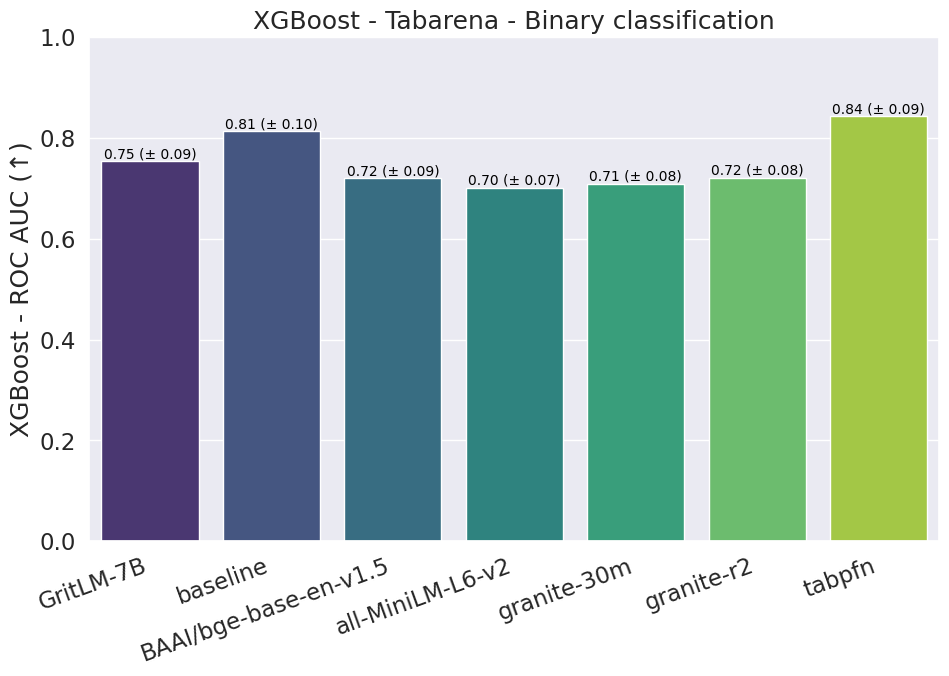

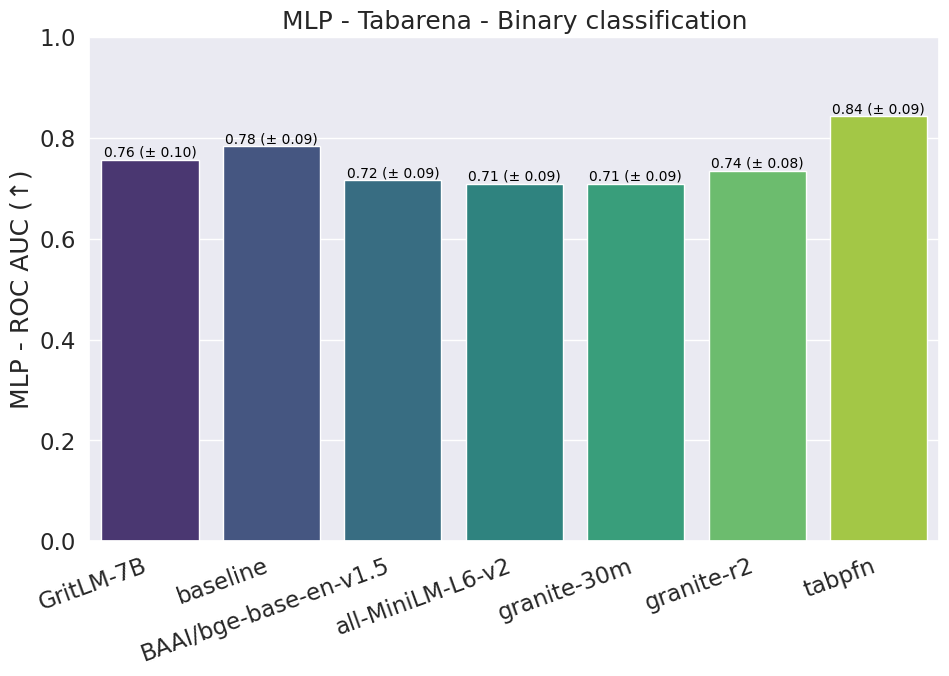

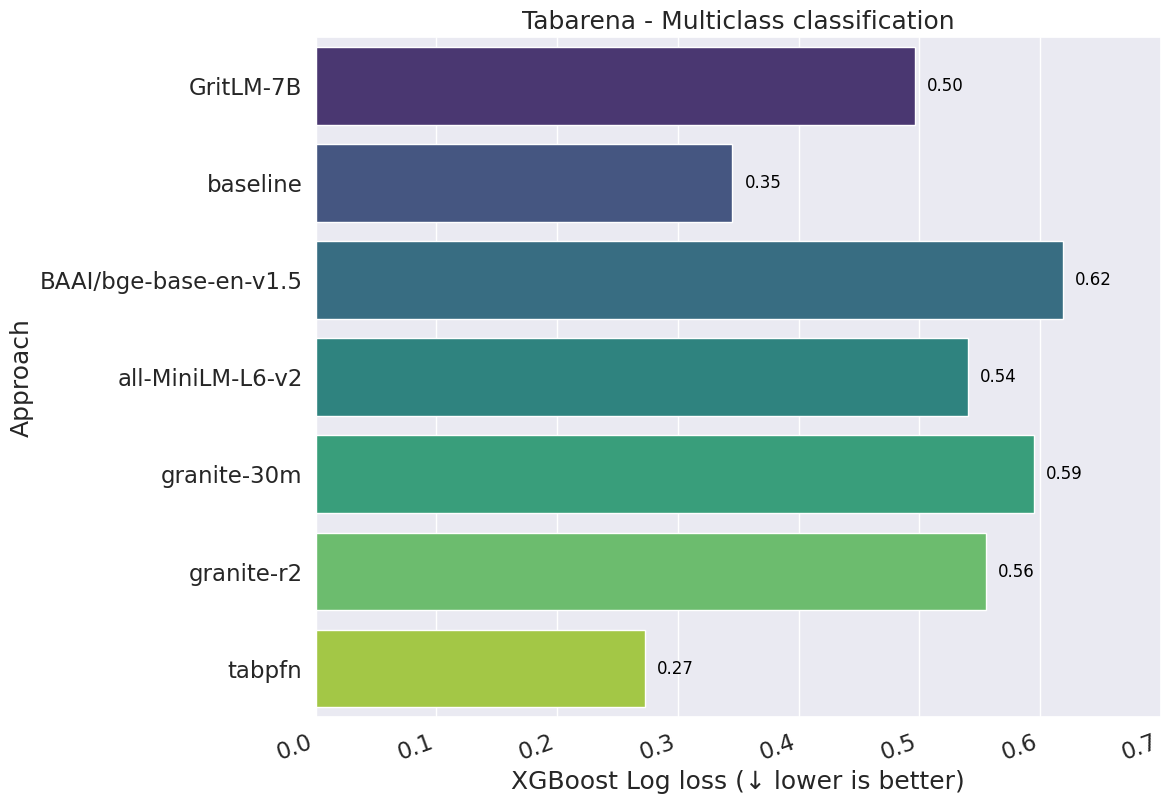

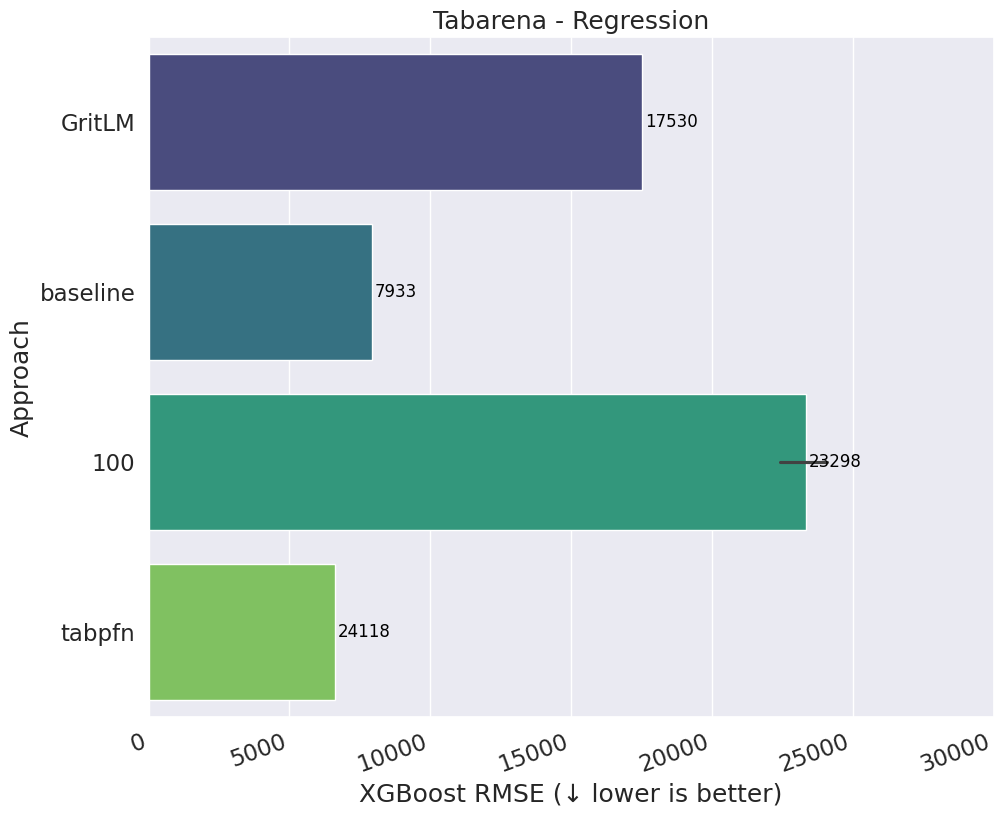

In [12]:

for task_type, task_type_df in task_type_groups:
    task_type_df = task_type_df.dropna(axis=1, how="all")
    task_type = task_type[0]

    # only keep results for datasets where all approaches have results
    complete_results_df = create_plots.filter_for_results_on_all_datasets(task_type, task_type_df)
    potentially_incomplete_results_df = task_type_df 

    ####################################################################################################
    # Create charts
    ####################################################################################################
    if task_type == "binary":
        results_column = 'XGBoost_roc_auc_score (↑)_mean'
        title = "Tabarena Binary Classification: Time Taken vs. Performance Reached"

        for model_name in ["XGBoost", "MLP"]:
            results_folder = model_to_folder[model_name]
            predML_plots.create_binary_barplot(df=complete_results_df, results_folder=results_folder, model_name=model_name)
            for plot_percentage in [True, False]:
                predML_plots.create_binary_barplot_altair(df=complete_results_df, 
                                                          results_folder=results_folder, 
                                                          model_name=model_name, 
                                                          aggregated=True, 
                                                          dataset_name="aggregated", 
                                                          plot_percentage_to_baseline=plot_percentage)

        #filename = "binary_nonnumeric_linechart.png"
        #predML_plots.create_nonnumeric_performance_plot(df=complete_results_df, task_type=task_type, metric_name=results_column, results_folder=predML_plots_folder, filename=filename)
        #filename = "binary_num_columns.png"
        #predML_plots.create_col_performance_plot(df=complete_results_df, task_type=task_type,metric_name=results_column, results_folder=predML_plots_folder, filename=filename)

        # create barplots per dataset
        unique_datasets = potentially_incomplete_results_df['dataset'].unique()

        for dataset_name in unique_datasets:
            # Filter data for the current dataset
            dataset_df = potentially_incomplete_results_df[potentially_incomplete_results_df['dataset'] == dataset_name].copy()
            # drop columns with all nans (result metrics from other tasks will be nan)
            dataset_df = dataset_df.dropna(axis=1, how="all")

            for model_name in ["XGBoost", "MLP"]:
                results_folder = model_to_folder[model_name]
                for plot_percentage in [True, False]:
                    predML_plots.create_binary_barplot_altair(df=dataset_df, 
                                                            results_folder=results_folder, 
                                                            model_name=model_name, 
                                                            aggregated=False, 
                                                            dataset_name=dataset_name, 
                                                            plot_percentage_to_baseline=plot_percentage)



            
    elif task_type == "multiclass":
        results_column = 'XGBoost_log_loss (↓)_mean'
        title = "Tabarena Multiclass Classification: Time Taken vs. Performance Reached"

        predML_plots.create_multiclass_barplot(df=complete_results_df, results_folder=predML_plots_folder)
        #filename = "multiclass_nonnumeric_linechart.png"
        #predML_plots.create_nonnumeric_performance_plot(df=complete_results_df, task_type=task_type,metric_name=results_column, results_folder=predML_plots_folder, filename=filename)
        #filename = "multiclass_num_columns.png"
        #predML_plots.create_col_performance_plot(df=complete_results_df, task_type=task_type,metric_name=results_column, results_folder=predML_plots_folder, filename=filename)

    elif task_type == "regression":
        current_df = complete_results_df.loc[complete_results_df['Approach'] != "tabicl"] # tabicl does not support regression
        results_column = 'XGBoost_rmse (↓)_mean'
        title = "Tabarena Regression: Time Taken vs. Performance Reached"

        predML_plots.create_regression_barplot(df=current_df, results_folder=predML_plots_folder)
        #filename = "regression_nonnumeric_linechart.png"
        #predML_plots.create_nonnumeric_performance_plot(df=current_df, task_type=task_type, metric_name=results_column, results_folder=predML_plots_folder, filename=filename)
        #filename = "regression_num_columns.png"
        #predML_plots.create_col_performance_plot(df=current_df, task_type=task_type,metric_name=results_column, results_folder=predML_plots_folder, filename=filename)

    else:
        raise ValueError(f"Task type unkown: {task_type}")


## Average rank and num best datasets

### For Binary Classification 

In [36]:
dataset_dominance_df = ranking.compute_dominance_and_avg_rank(filtered_task_df, metric_col='XGBoost_roc_auc_score (↑)_mean')
# sort by "num_datasets_best"
dataset_dominance_df = dataset_dominance_df.sort_values(by='avg_rank', ascending=True)
dataset_dominance_df.style

,task,Approach,Configuration,num_datasets_best,num_datasets_sole_best,datasets_sole_best,avg_rank
6,predictive_ml,tabpfn,device=cuda,27,27,"['Amazon_employee_access', 'Bank_Customer_Churn', 'Bioresponse', 'Diabetes130US', 'E-CommereShippingData', 'Fitness_Club', 'HR_Analytics_Job_Change_of_Data_Scientists', 'Is-this-a-good-customer', 'Marketing_Campaign', 'NATICUSdroid', 'bank-marketing', 'blood-transfusion-service-center', 'churn', 'coil2000_insurance_policies', 'credit-g', 'credit_card_clients_default', 'diabetes', 'hazelnut-spread-contaminant-detection', 'heloc', 'in_vehicle_coupon_recommendation', 'jm1', 'kddcup09_appetency', 'online_shoppers_intention', 'polish_companies_bankruptcy', 'qsar-biodeg', 'seismic-bumps', 'taiwanese_bankruptcy_prediction']",1.000000
1,predictive_ml,baseline,baseline,3,3,"['APSFailure', 'GiveMeSomeCredit', 'customer_satisfaction_in_airline']",2.166667
0,predictive_ml,GritLM,embedding_model=GritLM_GritLM-7B,0,0,[],3.633333
2,predictive_ml,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",0,0,[],4.833333
5,predictive_ml,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",0,0,[],4.966667
3,predictive_ml,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",0,0,[],5.400000
4,predictive_ml,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",0,0,[],5.400000


### For Multiclass classification

In [37]:
dataset_dominance_df = ranking.compute_dominance_and_avg_rank(filtered_task_df, metric_col='XGBoost_log_loss (↓)_mean', ascending=True)
# sort by "num_datasets_best"
dataset_dominance_df = dataset_dominance_df.sort_values(by='avg_rank', ascending=True)
dataset_dominance_df.style

,task,Approach,Configuration,num_datasets_best,num_datasets_sole_best,datasets_sole_best,avg_rank
6,predictive_ml,tabpfn,device=cuda,6,6,"['MIC', 'anneal', 'hiva_agnostic', 'splice', 'students_dropout_and_academic_success', 'website_phishing']",1.714286
1,predictive_ml,baseline,baseline,1,1,['SDSS17'],2.625000
0,predictive_ml,GritLM,embedding_model=GritLM_GritLM-7B,0,0,[],3.375000
3,predictive_ml,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",0,0,[],4.250000
4,predictive_ml,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",1,1,['maternal_health_risk'],4.500000
5,predictive_ml,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",0,0,[],5.000000
2,predictive_ml,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",0,0,[],5.875000


### For regression

In [39]:
dataset_dominance_df = ranking.compute_dominance_and_avg_rank(filtered_task_df, metric_col='XGBoost_rmse (↓)_mean', ascending=True)
# sort by "num_datasets_best"
dataset_dominance_df = dataset_dominance_df.sort_values(by='avg_rank', ascending=True)
dataset_dominance_df.style

,task,Approach,Configuration,num_datasets_best,num_datasets_sole_best,datasets_sole_best,avg_rank
6,predictive_ml,tabpfn,device=cuda,13,13,"['Another-Dataset-on-used-Fiat-500', 'Food_Delivery_Time', 'QSAR-TID-11', 'QSAR_fish_toxicity', 'airfoil_self_noise', 'concrete_compressive_strength', 'diamonds', 'healthcare_insurance_expenses', 'houses', 'miami_housing', 'physiochemical_protein', 'superconductivity', 'wine_quality']",1.000000
1,predictive_ml,baseline,baseline,0,0,[],2.000000
0,predictive_ml,GritLM,embedding_model=GritLM_GritLM-7B,0,0,[],3.230769
5,predictive_ml,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",0,0,[],5.076923
2,predictive_ml,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",0,0,[],5.230769
4,predictive_ml,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",0,0,[],5.538462
3,predictive_ml,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",0,0,[],5.923077


## ELO Scores

In [20]:
task_metrics_map = ranking.build_task_metrics_map(filtered_task_df)
print("Task metrics map (scores the elo metrics are based on):", task_metrics_map)

elo_df = ranking.get_elo_scores_for_task("predictive_ml", filtered_task_df, task_metrics_map)
# if dataframe not empty
if not elo_df.empty:
    elo_df = elo_df.sort_values(by='elo_score_task', ascending=False)
    elo_df.style
else:
    print("Elo dataframe is empty.")

Task metrics map (scores the elo metrics are based on): {'predictive_ml': [('LinearRegression_rmse (↓)_mean', False), ('XGBoost_roc_auc_score (↑)_mean', True), ('XGBoost_log_loss (↓)_mean', False)]}
Computing ELO for task predictive_ml using metrics: [('LinearRegression_rmse (↓)_mean', False), ('XGBoost_roc_auc_score (↑)_mean', True), ('XGBoost_log_loss (↓)_mean', False)]


In [21]:
elo_df.style

,task,Approach,Configuration,elo_score_task
6,predictive_ml,tabpfn,device=cuda,1581.849952
1,predictive_ml,baseline,baseline,1536.181333
0,predictive_ml,GritLM,embedding_model=GritLM_GritLM-7B,1514.873383
5,predictive_ml,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",1473.319089
2,predictive_ml,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",1470.900384
3,predictive_ml,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",1465.001275
4,predictive_ml,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",1464.294188


### ELO Scores who beats whom?

In [23]:
pairwise_df = ranking.compute_pairwise_wins(filtered_task_df, metric_col='XGBoost_roc_auc_score (↑)_mean')
pairwise_df.style

,Approach_A,Config_A,Approach_B,Config_B,num_datasets_A_beats_B
0,GritLM,embedding_model=GritLM_GritLM-7B,baseline,baseline,2
1,GritLM,embedding_model=GritLM_GritLM-7B,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",23
2,GritLM,embedding_model=GritLM_GritLM-7B,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",25
3,GritLM,embedding_model=GritLM_GritLM-7B,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",24
4,GritLM,embedding_model=GritLM_GritLM-7B,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-english-r2,table_row_limit=100",24
5,GritLM,embedding_model=GritLM_GritLM-7B,tabpfn,device=cuda,0
6,baseline,baseline,GritLM,embedding_model=GritLM_GritLM-7B,28
7,baseline,baseline,sentence_transformer,"embedding_model=BAAI_bge-base-en-v1.5,table_row_limit=100",28
8,baseline,baseline,sentence_transformer,"embedding_model=all-MiniLM-L6-v2,table_row_limit=100",28
9,baseline,baseline,sentence_transformer,"embedding_model=ibm-granite_granite-embedding-30m-english,table_row_limit=100",29


In [19]:
filtered_task_df.style

,Approach,Configuration,task,dataset,# Runs,XGBoost_roc_auc_score (↑)_mean,KNeighbors_roc_auc_score (↑)_mean,MLP_roc_auc_score (↑)_mean,XGBoost_log_loss (↓)_mean,KNeighbors_log_loss (↓)_mean,MLP_log_loss (↓)_mean,XGBoost_rmse (↓)_mean,KNeighbors_rmse (↓)_mean,LinearRegression_rmse (↓)_mean,MLP_rmse (↓)_mean,approach_rmse (↓)_mean,approach_roc_auc_score (↑)_mean,approach_log_loss (↓)_mean,XGBoost_rmse (↓)_ratio_to_baseline_mean,LinearRegression_rmse (↓)_ratio_to_baseline_mean,MLP_rmse (↓)_ratio_to_baseline_mean,XGBoost_roc_auc_score (↑)_ratio_to_baseline_mean,MLP_roc_auc_score (↑)_ratio_to_baseline_mean,XGBoost_log_loss (↓)_ratio_to_baseline_mean,MLP_log_loss (↓)_ratio_to_baseline_mean,_rows_count,model_setup---execution_time (s),model_setup---peak_cpu (%),model_setup---average_cpu (%),model_setup---peak_memory (MB),model_setup---average_memory (MB),task_inference---execution_time (s),task_inference---peak_cpu (%),task_inference---average_cpu (%),task_inference---peak_memory (MB),task_inference---average_memory (MB),task_type,num_cols,num_nonnumeric
6,GritLM,embedding_model=GritLM_GritLM-7B,predictive_ml,APSFailure,1,0.974518,0.887448,0.982943,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.981503,1.052941,nan,nan,1,3059.136038,6435.600000,279.281871,11505.085938,4127.528367,1437.935640,5806.900000,139.430536,10211.281250,8961.405216,binary,170,0
7,GritLM,embedding_model=GritLM_GritLM-7B,predictive_ml,Amazon_employee_access,1,0.742272,0.703756,0.778249,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.891074,0.949762,nan,nan,1,392.691407,6431.800000,700.318852,6484.144531,2587.829350,154.247864,5281.300000,171.633990,5254.820312,4819.059229,binary,9,0
8,GritLM,embedding_model=GritLM_GritLM-7B,predictive_ml,Another-Dataset-on-used-Fiat-500,1,nan,nan,nan,nan,nan,nan,1159.770996,1303.678888,1108.812378,814.342163,nan,nan,nan,0.677355,0.668404,6.704010,nan,nan,nan,nan,1,51.131327,6436.800000,4888.505034,6170.585938,2443.705996,4.453526,448.700000,146.573913,3014.722656,2359.756284,regression,7,1
9,GritLM,embedding_model=GritLM_GritLM-7B,predictive_ml,Bank_Customer_Churn,1,0.813449,0.705833,0.814117,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.962399,0.962957,nan,nan,1,95.873891,6439.300000,2151.087276,6507.511719,2647.556730,25.213678,2824.100000,160.100000,4125.765625,3103.361328,binary,10,2
10,GritLM,embedding_model=GritLM_GritLM-7B,predictive_ml,Bioresponse,1,0.784944,0.733717,0.786105,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.890905,0.950929,nan,nan,1,147.420089,6423.000000,631.323016,7405.226562,4538.943757,67.080014,4211.300000,171.251775,7544.265625,6374.684911,binary,1776,0
11,GritLM,embedding_model=GritLM_GritLM-7B,predictive_ml,Diabetes130US,1,0.589900,0.539387,0.599066,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.935924,1.020840,nan,nan,1,2596.372932,6440.100000,607.188501,9495.472656,3263.015234,1121.028665,6321.800000,137.484886,8148.488281,7100.625598,binary,47,39
12,GritLM,embedding_model=GritLM_GritLM-7B,predictive_ml,E-CommereShippingData,1,0.713963,0.551404,0.729233,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.967638,1.022393,nan,nan,1,111.474028,6436.100000,2702.580929,6434.589844,2722.088101,30.311843,2154.000000,159.420395,4170.671875,3137.654348,binary,10,4
13,GritLM,embedding_model=GritLM_GritLM-7B,predictive_ml,Fitness_Club,1,0.707596,0.625369,0.739659,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.935257,0.952595,nan,nan,1,28.036067,1618.400000,783.259615,6461.875000,2720.210111,2.257564,219.500000,123.911111,2325.101562,2165.960069,binary,6,3
14,GritLM,embedding_model=GritLM_GritLM-7B,predictive_ml,Food_Delivery_Time,1,nan,nan,nan,nan,nan,nan,8.423687,9.471421,7.553729,9.337223,nan,nan,nan,0.903749,1.112941,0.931316,nan,nan,nan,nan,1,687.808199,6440.100000,2297.463996,6321.914062,3355.379346,185.174373,6138.200000,203.424837,5575.976562,4612.405068,regression,9,3
15,GritLM,embedding_model=GritLM_GritLM-7B,predictive_ml,GiveMeSomeCredit,1,0.826834,0.69